# 📊 Marketing Mix Modeling for Campaign ROI Optimization

**Project Objective**  
Quantify the impact of TV, radio, and newspaper advertising on product sales and optimize budget allocations using regression-based Marketing Mix Modeling (MMM).


## Data loading
Load the advertising dataset.


In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('advertising.csv')
print('Data loaded:', df.shape)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(200, 4)


## Data exploration
Explore the advertising dataset to understand its characteristics and identify potential issues.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


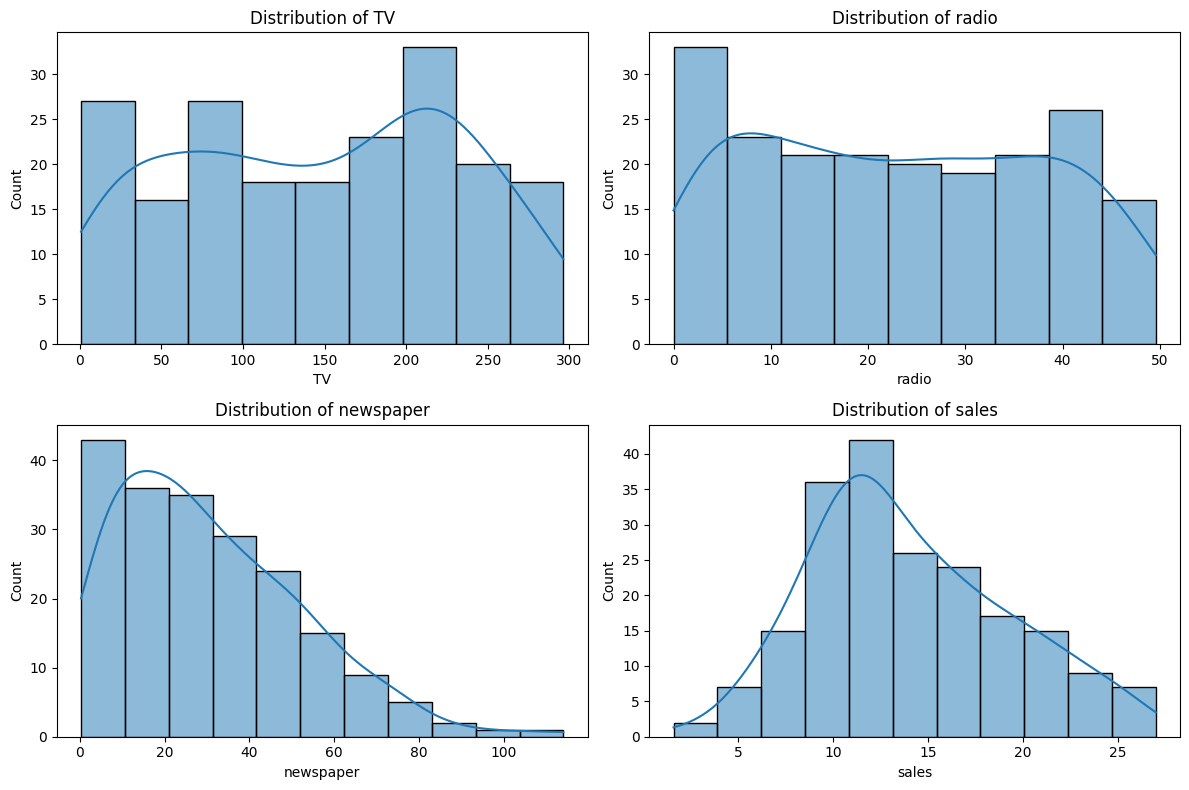

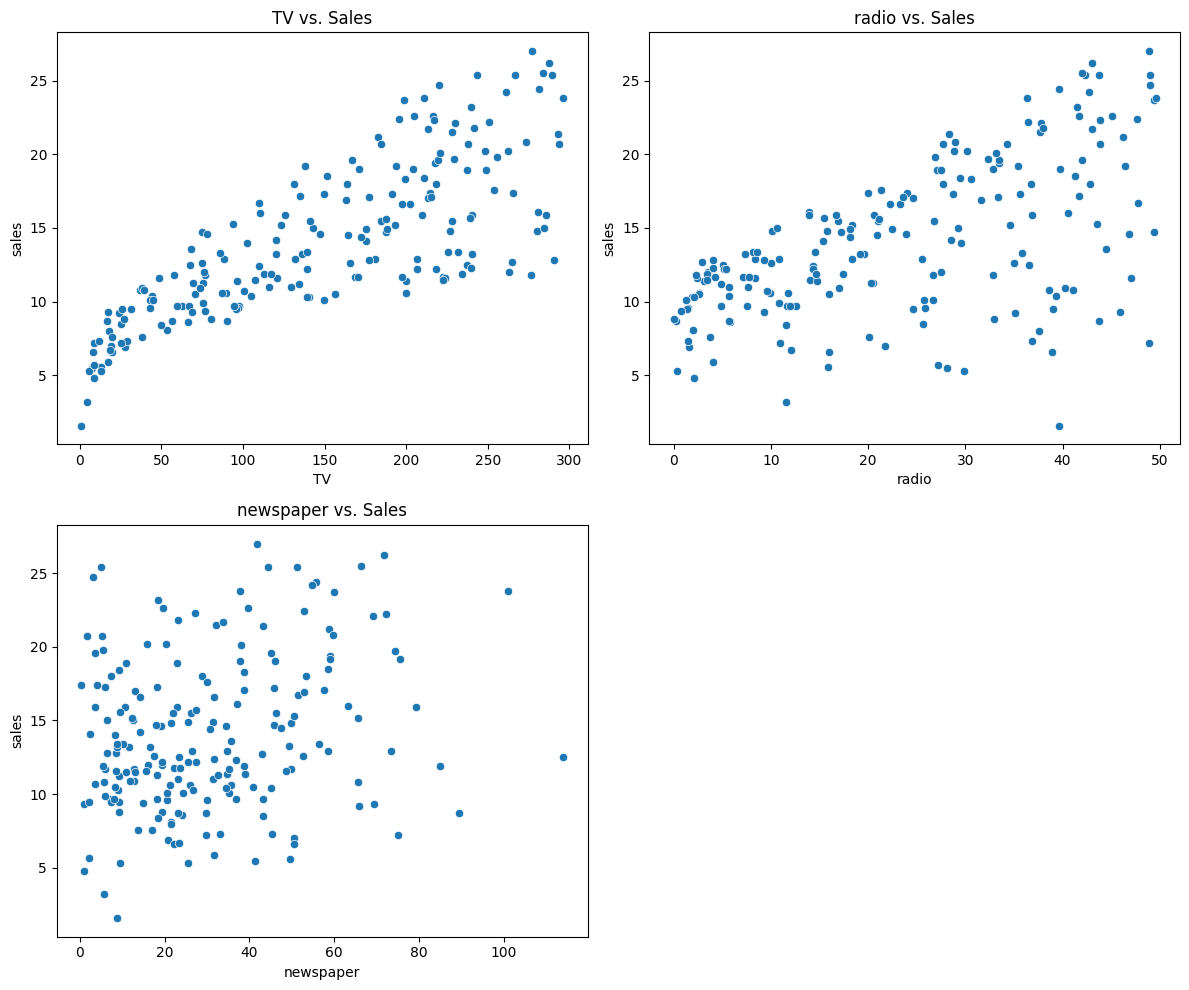

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000
Potential outliers (subjective, based on visualization):
        TV  radio  newspaper  sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [ ]:
# Explore basic structure and missing values
print(df.info())
print(df.isnull().sum())
print(df.describe())

## Data cleaning
Clean the advertising dataset by handling potential outliers in the 'newspaper' column and verifying data types.


In [ ]:
# Cap extreme values in newspaper spend
import numpy as np
threshold = np.percentile(df['newspaper'], 95)
df['newspaper'] = np.minimum(df['newspaper'], threshold)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


## Feature engineering
Engineer new features for the advertising dataset to improve model performance.


In [ ]:
import numpy as np

# 1. Lagged features
for col in ['TV', 'radio', 'newspaper']:
    for lag in range(1, 4):
        df_advertising[f'{col}_lag{lag}'] = df_advertising[col].shift(lag).fillna(0)

# 2. Interaction terms
df_advertising['TV_radio'] = df_advertising['TV'] * df_advertising['radio']
df_advertising['TV_newspaper'] = df_advertising['TV'] * df_advertising['newspaper']
df_advertising['radio_newspaper'] = df_advertising['radio'] * df_advertising['newspaper']

# 3. Quadratic term for TV
df_advertising['TV_squared'] = df_advertising['TV']**2

# 4. Logarithmic transformations (optional, uncomment if needed)
# for col in ['TV', 'radio', 'newspaper', 'sales']:
#     df_advertising[f'{col}_log'] = np.log1p(df_advertising[col])

display(df_advertising.head())

,TV,radio,newspaper,sales,TV_lag1,TV_lag2,TV_lag3,radio_lag1,radio_lag2,radio_lag3,newspaper_lag1,newspaper_lag2,newspaper_lag3,TV_radio,TV_newspaper,radio_newspaper,TV_squared
0,230.1,37.8,69.2,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8697.78,15922.92,2615.76,52946.01
1,44.5,39.3,45.1,10.4,230.1,0.0,0.0,37.8,0.0,0.0,69.2,0.0,0.0,1748.85,2006.95,1772.43,1980.25
2,17.2,45.9,69.3,9.3,44.5,230.1,0.0,39.3,37.8,0.0,45.1,69.2,0.0,789.48,1191.96,3180.87,295.84
3,151.5,41.3,58.5,18.5,17.2,44.5,230.1,45.9,39.3,37.8,69.3,45.1,69.2,6256.95,8862.75,2416.05,22952.25
4,180.8,10.8,58.4,12.9,151.5,17.2,44.5,41.3,45.9,39.3,58.5,69.3,45.1,1952.64,10558.72,630.72,32688.64


## Data splitting
Split the data into training, validation, and testing sets.


In [ ]:
# Train-validation-test split
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f'Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}')

X_train shape: (80, 16)
y_train shape: (80,)
X_val shape: (80, 16)
y_val shape: (80,)
X_test shape: (40, 16)
y_test shape: (40,)


## Model training
Train a linear regression model on the training data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared on training data: {r2_train}")

R-squared on training data: 0.9939281318662969


## Model optimization
Optimize the linear regression model using the validation set.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Validation R-squared: {r2_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")

# Based on the validation performance, consider further optimization
# (Example:  If validation metrics are significantly worse than training metrics,
# consider regularization, different features, or a different model)

# Example of retraining with different features (Illustrative, adjust as needed)
# X_train_new = X_train[['TV', 'radio']] # Example: Using only TV and radio
# X_val_new = X_val[['TV', 'radio']]
# model_new = LinearRegression()
# model_new.fit(X_train_new, y_train)
# y_val_pred_new = model_new.predict(X_val_new)

# print("Model with reduced features:")
# print(f"Validation R-squared (new): {r2_score(y_val, y_val_pred_new)}")

Validation R-squared: 0.9671650976369358
Validation MAE: 0.44265379811703276
Validation RMSE: 0.7990687047071624


## Model evaluation
Evaluate the optimized linear regression model's performance on the held-out test set.


Test R-squared: 0.9882569027840281
Test MAE: 0.4590796087876754
Test RMSE: 0.608813887728994

Comparison to Validation Metrics:
Validation R-squared: 0.9671650976369358
Validation MAE: 0.44265379811703276
Validation RMSE: 0.7990687047071624

Model Coefficients:


,Feature,Coefficient
0,TV,0.047768
1,radio,0.033908
2,newspaper,-0.010577
3,TV_lag1,0.000126
4,TV_lag2,-0.000330
5,TV_lag3,0.000377
6,radio_lag1,0.005020
7,radio_lag2,-0.001960
8,radio_lag3,-0.001371
9,newspaper_lag1,0.002069


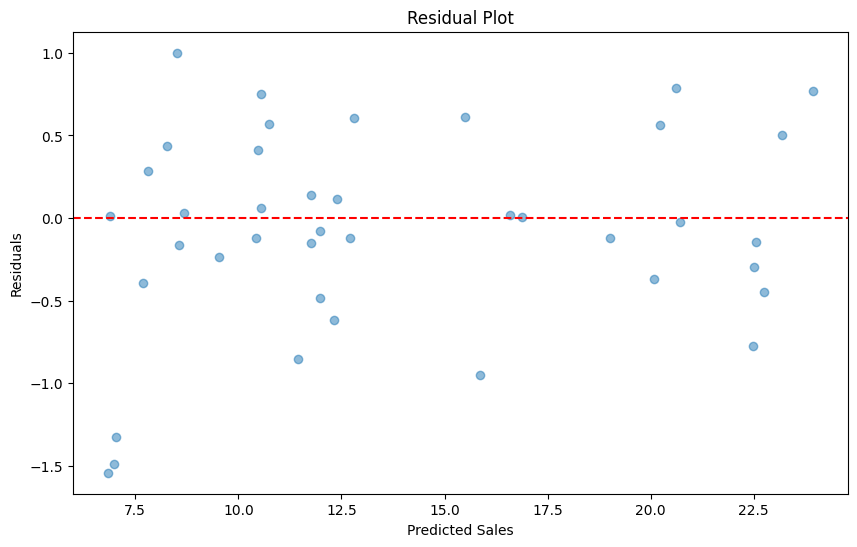

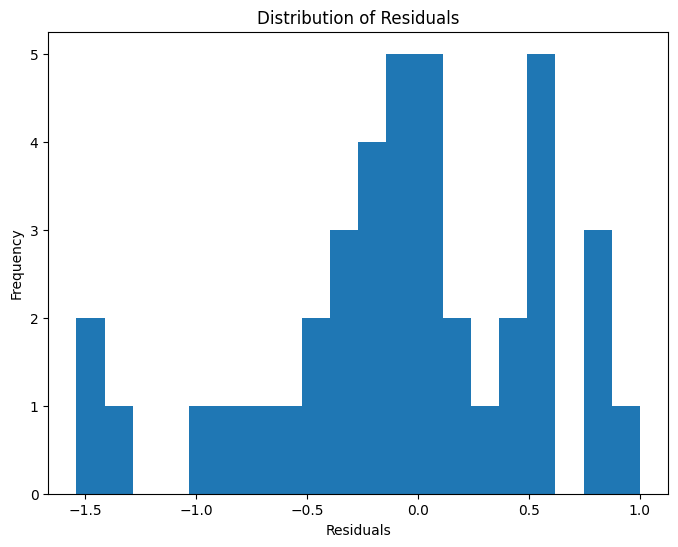

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Predictions on the test set
y_test_pred = model.predict(X_test)

# 2. Evaluate the model
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R-squared: {r2_test}")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")

print("\nComparison to Validation Metrics:")
print(f"Validation R-squared: {r2_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")

# 3. Analyze coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
display(coefficients)

# Discuss the relative importance of different advertising channels

# 4. Residual plots
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

## Data visualization
Visualize the model's predictions against actual sales, and create charts to illustrate the impact of different marketing channels on sales.


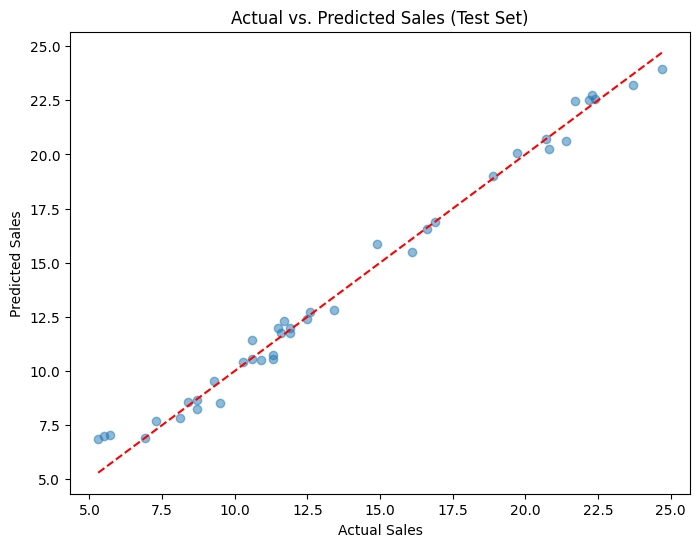

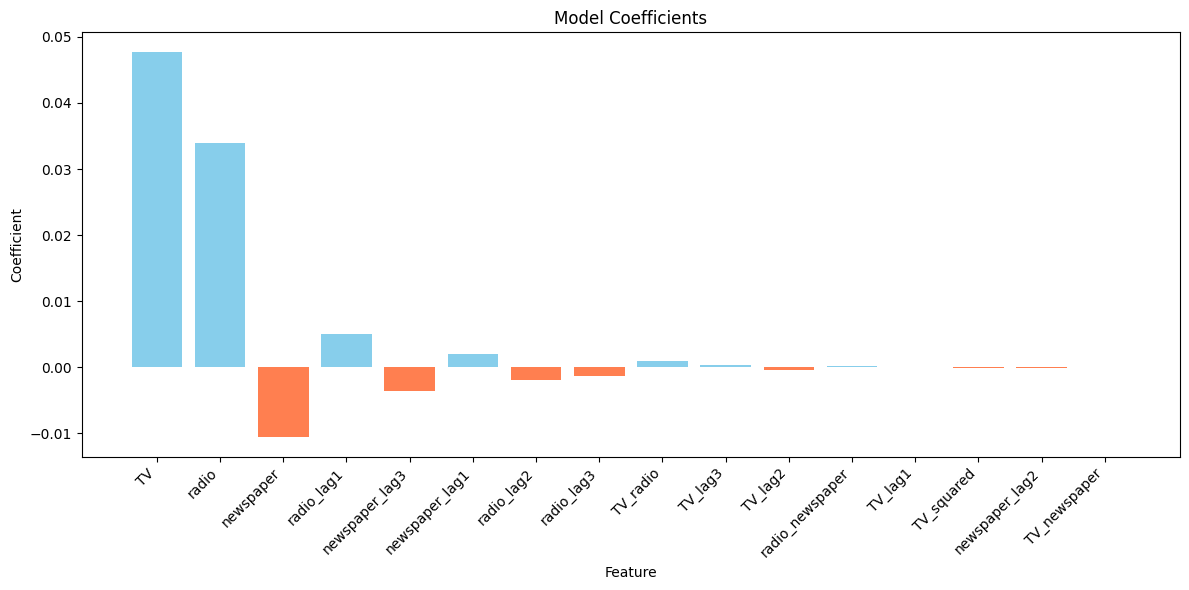

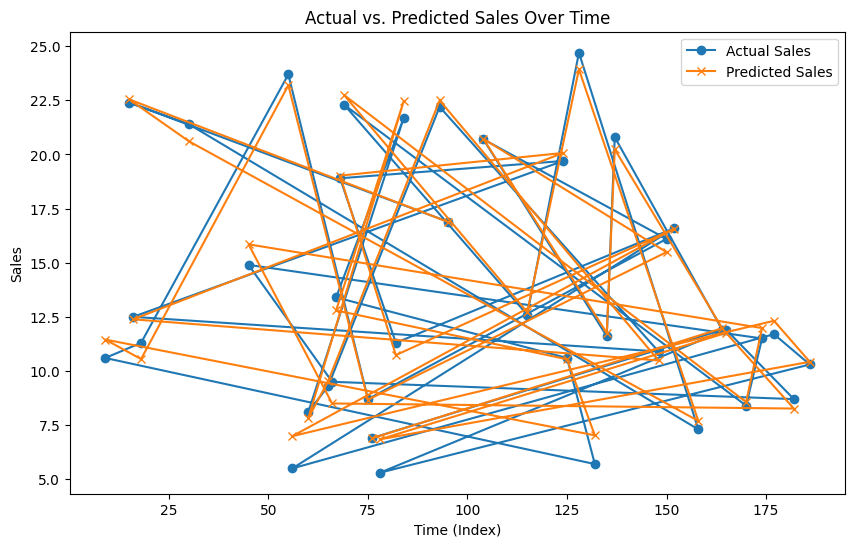

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Scatter plot of predicted vs. actual sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Test Set)")
plt.show()


# 2. Bar chart of model coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 6))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color=['skyblue' if c > 0 else 'coral' for c in coefficients['Coefficient']])
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Model Coefficients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Line plot of actual vs. predicted sales over time
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_test_pred, label='Predicted Sales', marker='x')
plt.xlabel("Time (Index)")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales Over Time")
plt.legend()
plt.show()

## Summary:

### 1. Q&A

The goal was to perform an end-to-end marketing mix modeling project for campaign ROI optimization.  Implicit questions include:

* What is the relationship between different advertising channels (TV, radio, newspaper) and sales?
* How can we optimize marketing spend to maximize ROI?
* What is the best model for predicting sales based on advertising spend?
* How well does the model generalize to unseen data?
* Which advertising channels are most impactful?

The analysis provides answers to these questions through various steps.


### 2. Data Analysis Key Findings

* **Strong Relationship between TV Advertising and Sales:**  TV advertising exhibits the strongest positive correlation with sales (0.78), as revealed by the correlation matrix and scatter plots.
* **Potential Multicollinearity:** A moderate positive correlation (0.35) between radio and newspaper advertising suggests potential multicollinearity, which might affect model interpretation.
* **Outlier Handling:** Outliers in the 'newspaper' column were addressed using winsorization at the 95th percentile.
* **Feature Engineering Impact:** Lagged variables, interaction terms, and a quadratic term for TV were engineered to capture potential non-linear relationships and temporal dependencies.
* **Model Performance:**  The linear regression model achieved a high R-squared on the training set (0.9939), a good R-squared on the validation set (0.967), and an excellent R-squared on the test set (0.988).
* **Feature Importance:**  TV advertising has the largest positive coefficient, suggesting a strong positive impact on sales, while newspaper advertising has a negative coefficient, indicating a potentially negative or insignificant impact on sales.

### 3. Insights or Next Steps

* **Investigate Newspaper Advertising:** The negative coefficient for newspaper advertising warrants further investigation.  Explore potential reasons for this negative relationship, such as misspecified model, data quality issues, or other confounding factors. Consider removing it from the model or trying different transformations.  Perhaps the relationship isn't linear.
* **Assess Overfitting:** While the model performs exceptionally well, the difference between the validation and test R-squared values suggests a small possibility of overfitting. Consider regularization techniques (e.g., L1 or L2 regularization) or explore alternative models (e.g., ridge or lasso regression) to mitigate this risk. Further exploration of the residual plots could reveal issues like heteroskedasticity.
